# Classificação 1

O objetivo deste notebook é fazer a predição de insuficiência cardíaca


In [189]:
# Importando libs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

In [190]:
# Lendo e observando os dados

df = pd.read_csv('heart_failure_predict.csv')
df.head()

,Age,Age.Group,Gender,Locality,Marital status,Life.Style,Sleep,Category,Depression,Hyperlipi,...,oldpeak,slope,ca,thal,num,SK,SK.React,Reaction,Mortality,Follow.Up
0,45,41-50,Female,RURAL,MARRIED,NO,NO,FREE,YES,YES,...,3.0,2,0,7,2,1,NO,0,0,60
1,51,51-60,Female,URBAN,MARRIED,NO,NO,FREE,YES,YES,...,1.2,2,0,7,2,1,NO,0,0,15
2,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,...,3.4,2,0,3,2,1,NO,0,0,6
3,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,...,2.0,2,1,7,3,1,NO,0,0,52
4,56,51-60,Female,RURAL,MARRIED,YES,NO,FREE,YES,YES,...,4.0,3,2,7,3,1,NO,0,0,34


In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 60 columns):
 #   Column                                                                                    Non-Null Count  Dtype  
---  ------                                                                                    --------------  -----  
 0   Age                                                                                       368 non-null    int64  
 1   Age.Group                                                                                 368 non-null    object 
 2   Gender                                                                                    368 non-null    object 
 3   Locality                                                                                  368 non-null    object 
 4   Marital status                                                                            368 non-null    object 
 5   Life.Style                                               

In [192]:
df.describe(percentiles = [.01, .05, .25, .5, .75, .95, .99])

,Age,F.History,Diabetes,BP,Thrombolysis,BGR,B.Urea,S.Cr,S.Sodium,S.Potassium,...,exang,oldpeak,slope,ca,thal,num,SK,Reaction,Mortality,Follow.Up
count,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,...,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000
mean,54.293478,0.195652,0.461957,121.213315,0.032609,219.991848,51.681522,1.716902,138.019022,4.210870,...,0.562500,1.541848,1.842391,1.002717,5.858696,2.035326,0.983696,0.747283,0.217391,28.652174
std,8.718158,0.397242,0.499229,24.539205,0.177852,139.337387,62.582571,3.609296,4.079879,0.394984,...,0.496754,1.385381,0.564284,1.037442,1.744319,1.031573,0.126816,0.435162,0.413033,15.811860
min,24.000000,0.000000,0.000000,80.500000,0.000000,60.000000,2.300000,0.600000,129.000000,3.300000,...,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000
1%,24.000000,0.000000,0.000000,80.500000,0.000000,60.000000,2.300000,0.600000,129.000000,3.300000,...,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,3.000000
5%,38.000000,0.000000,0.000000,90.600000,0.000000,85.000000,24.000000,0.800000,130.000000,3.800000,...,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000,1.000000,0.000000,0.000000,5.000000
25%,50.750000,0.000000,0.000000,100.700000,0.000000,117.000000,28.000000,0.900000,135.000000,3.900000,...,0.000000,0.275000,1.750000,0.000000,3.000000,1.000000,1.000000,0.000000,0.000000,15.000000
50%,55.000000,0.000000,0.000000,120.800000,0.000000,164.000000,36.000000,0.900000,138.000000,4.200000,...,1.000000,1.200000,2.000000,1.000000,7.000000,2.000000,1.000000,1.000000,0.000000,32.000000
75%,60.250000,0.000000,1.000000,140.700000,0.000000,291.000000,43.000000,1.100000,141.000000,4.400000,...,1.000000,2.200000,2.000000,2.000000,7.000000,3.000000,1.000000,1.000000,0.000000,36.000000
95%,66.000000,1.000000,1.000000,160.900000,0.000000,563.000000,104.000000,4.000000,145.000000,4.900000,...,1.000000,4.000000,3.000000,3.000000,7.000000,4.000000,1.000000,1.000000,1.000000,57.000000


## Tratamento e seleção de variáveis

In [193]:
# Colocando na variável cat_columns as colunas com features categóricas

cat_columns = []

for c in df.columns:
    if df[c].dtype=='object': 
        cat_columns.append(c)

In [194]:
cat_columns

['Age.Group',
 'Gender',
 'Locality  ',
 'Marital status                       ',
 'Life.Style                                                                              ',
 'Sleep',
 'Category',
 'Depression',
 'Hyperlipi',
 'Smoking',
 'Family.History',
 'HTN',
 'Allergies',
 'Others ',
 'CO',
 'Diagnosis',
 'Hypersensitivity',
 'SK.React']

In [195]:
# A variavel Age.Group é ordinal. Será usando o label_encoding para ela

cat_columns.remove('Age.Group')
cat_columns

['Gender',
 'Locality  ',
 'Marital status                       ',
 'Life.Style                                                                              ',
 'Sleep',
 'Category',
 'Depression',
 'Hyperlipi',
 'Smoking',
 'Family.History',
 'HTN',
 'Allergies',
 'Others ',
 'CO',
 'Diagnosis',
 'Hypersensitivity',
 'SK.React']

In [196]:
# Fazendo uma cópia para não alterar o dataset original

df2 = pd.get_dummies(df, columns = cat_columns)

In [197]:
le = LabelEncoder()

df2['Age.Group'] = le.fit_transform(df['Age.Group'])

In [198]:
le.classes_

array(['21-30', '31-40', '41-50', '51-60', '61-70'], dtype=object)

In [199]:
X = df2.copy()
X.drop(columns='Mortality', inplace=True)

In [200]:
y = df2['Mortality']

<AxesSubplot:>

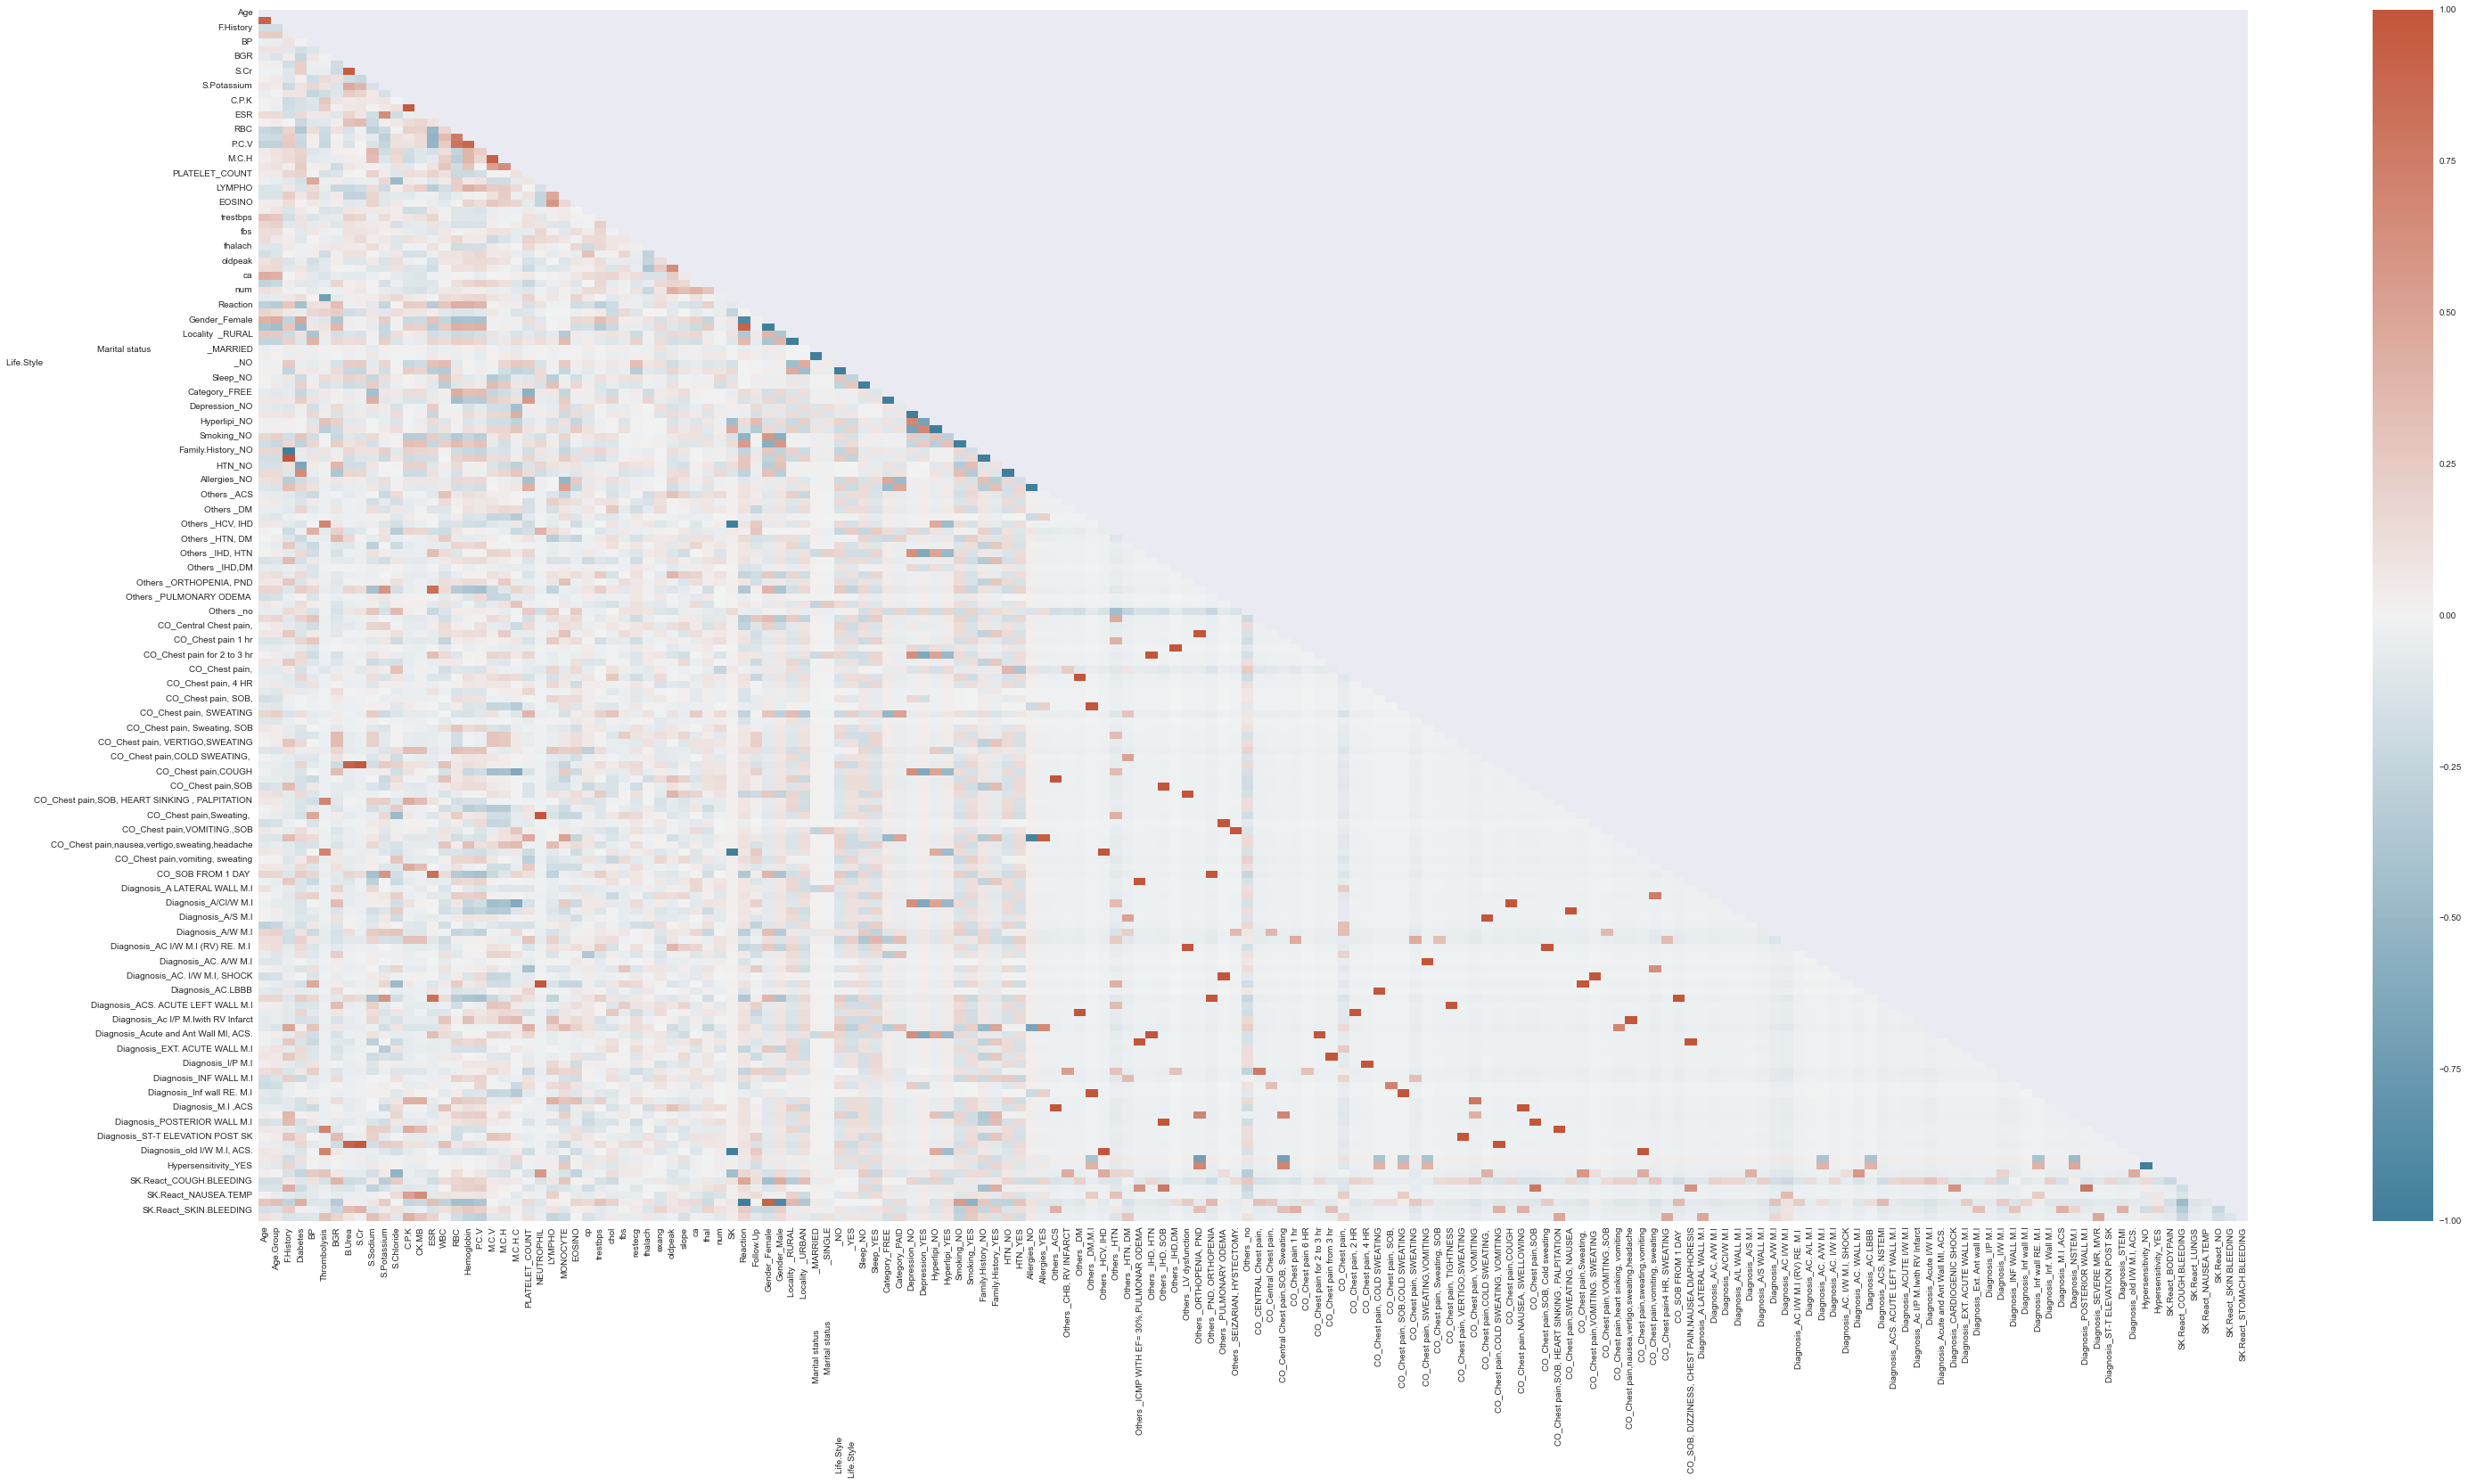

In [201]:
# Observando a correlação entre as variáveis

corr_matrix = X.corr()
f, ax = plt.subplots(figsize=(50, 25))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool)) # Gera uma máscara para o triângulo superior
cmap = sns.diverging_palette(230, 20, as_cmap=True) # Configura um mapa de cores divergente personalizado 

sns.heatmap(corr_matrix, annot=False, mask = mask, cmap=cmap) # Plotando o heatmap

In [202]:
# Removendo as variáveis que são altamente correlacionadas entre si

correlated_features = set()

for i in range(len(corr_matrix .columns)):
    for j in range(i+1, len(corr_matrix .columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.9:
            print(corr_matrix.columns[i]+" - "+corr_matrix.columns[j])
            colname = corr_matrix.columns[i]
            correlated_features.add(colname)

print(correlated_features)

Age - Age.Group
F.History - Family.History_NO
F.History - Family.History_YES
B.Urea - S.Cr
B.Urea - CO_Chest pain,COLD SWEATING, VOMITING
B.Urea - Diagnosis_STEMI
S.Cr - CO_Chest pain,COLD SWEATING, VOMITING
S.Cr - Diagnosis_STEMI
C.P.K - CK.MB
M.C.V - M.C.H
NEUTROPHIL - CO_Chest pain,Sweating, 
NEUTROPHIL - Diagnosis_AC. WALL M.I
SK - Others _HCV, IHD
SK - CO_Chest pain,sweating,vomiting
SK - Diagnosis_old I/W M.I, ACS.
Reaction - Gender_Female
Reaction - Gender_Male
Reaction - SK.React_NO
Gender_Female - Gender_Male
Gender_Female - SK.React_NO
Gender_Male - SK.React_NO
Locality  _RURAL - Locality  _URBAN
Marital status                       _MARRIED - Marital status                       _SINGLE
Life.Style                                                                              _NO - Life.Style                                                                              _YES
Sleep_NO - Sleep_YES
Category_FREE - Category_PAID
Depression_NO - Depression_YES
Hyperlipi_NO - Hyperlipi

In [203]:
# Observando a quantidade e as features relacionadas

len(correlated_features)

60

In [204]:
correlated_features

{'Age',
 'Allergies_NO',
 'Allergies_YES',
 'B.Urea',
 'C.P.K',
 'CO_Chest pain for 2 to 3 hr',
 'CO_Chest pain from 3 hr',
 'CO_Chest pain, 2 HR',
 'CO_Chest pain, 4 HR',
 'CO_Chest pain, COLD SWEATING',
 'CO_Chest pain, SOB,COLD SWEATING',
 'CO_Chest pain, SWEATING,VOMITING',
 'CO_Chest pain, TIGHTNESS',
 'CO_Chest pain, VERTIGO,SWEATING',
 'CO_Chest pain,COLD SWEATING, ',
 'CO_Chest pain,COLD SWEATING, VOMITING',
 'CO_Chest pain,COUGH',
 'CO_Chest pain,NAUSEA, SWELLOWING',
 'CO_Chest pain,SOB',
 'CO_Chest pain,SOB, Cold sweating',
 'CO_Chest pain,SOB, HEART SINKING , PALPITATION',
 'CO_Chest pain,SWEATING, NAUSEA',
 'CO_Chest pain,Sweating, ',
 'CO_Chest pain,VOMITING. SWEATING ',
 'CO_Chest pain,nausea,vertigo,sweating,headache',
 'CO_Chest pain,sweating,vomiting',
 'CO_SOB FROM 1 DAY ',
 'CO_SOB, DIZZINESS, CHEST PAIN,NAUSEA,DIAPHORESIS',
 'Category_FREE',
 'Depression_NO',
 'F.History',
 'Family.History_NO',
 'Gender_Female',
 'Gender_Male',
 'HTN_NO',
 'Hyperlipi_NO',
 'Hypersen

In [205]:
# Para clareza na hora da análise, não será removido o gênero e sim o reaction

correlated_features.remove('Gender_Female')
correlated_features.add('SK.React_NO')

In [206]:
X_novo = X.drop(labels=correlated_features, axis=1)

In [207]:
len(X.columns), len(X_novo.columns)

(166, 106)

## Estimando informações mútuas para uma variável de destino discreta.

A informação mútua (MI) entre duas variáveis aleatórias é um valor não negativo, que mede a dependência entre as variáveis. É igual a zero se e somente se duas variáveis aleatórias são independentes e valores mais altos significam maior dependência.

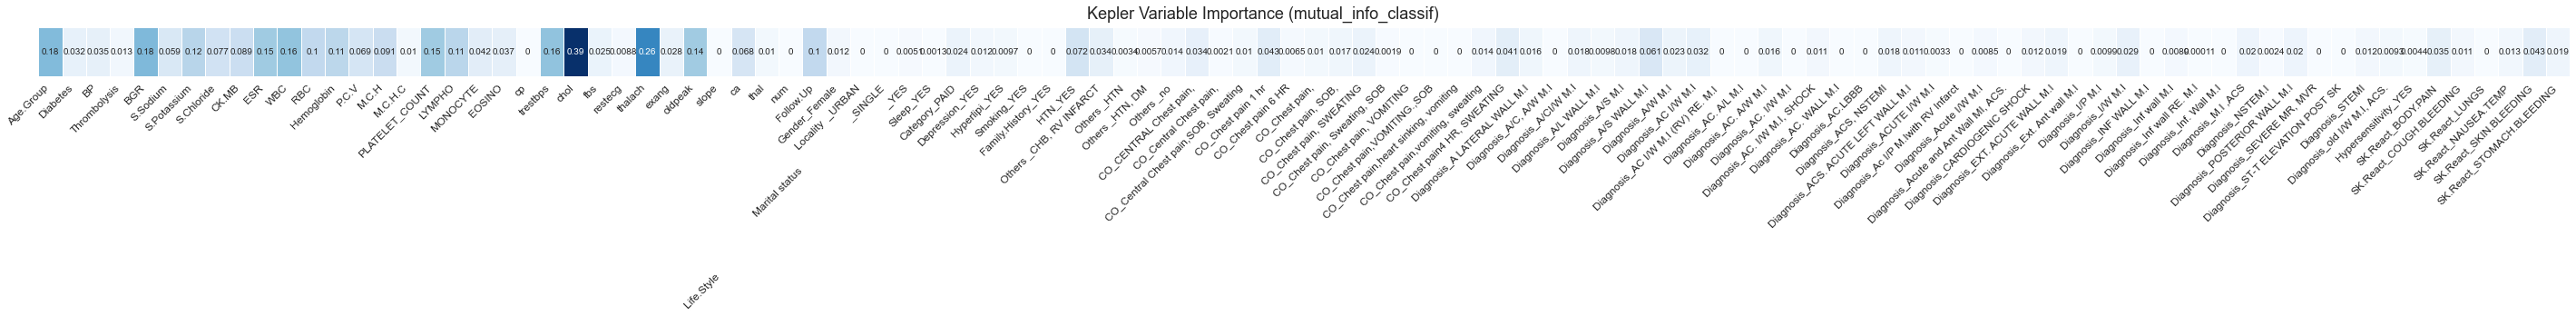

In [208]:
kepler_mutual_information = mutual_info_classif(X_novo, y)

plt.subplots(1, figsize=(50, 1))
sns.heatmap(kepler_mutual_information[:, np.newaxis].T, cmap='Blues', cbar=False, linewidths=1, annot=True)
plt.yticks([], [])
plt.gca().set_xticklabels(X_novo.columns, rotation=45, ha='right', fontsize=12)
plt.suptitle("Kepler Variable Importance (mutual_info_classif)", fontsize=18, y=1.2)
plt.gcf().subplots_adjust(wspace=0.2)

Variáveis como sono, alergias e hipersensibilidade não afetam na mortalidade, tendo valor de MI igual a 0, enquanto variáveis como chol, thalach e idade, afetam mais diretamente a Mortalidade 

In [209]:
from sklearn.feature_selection import GenericUnivariateSelect

# Selecionando 30 variáveis para treino e observando como fica o modelo
trans = GenericUnivariateSelect(score_func=mutual_info_classif, param=30)
X_novo2 = trans.fit_transform(X_novo, y)

In [210]:
trans.get_support()

array([ True,  True,  True, False,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True, False, False,  True, False,
        True, False,  True, False, False,  True,  True, False, False,
        True, False,  True, False, False, False,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False,  True])

In [211]:
X_novo.columns[trans.get_support()]

Index(['Age.Group', 'Diabetes', 'BP', 'BGR', 'S.Sodium', 'S.Potassium',
       'CK.MB', 'ESR', 'WBC', 'RBC', 'Hemoglobin', 'P.C.V', 'M.C.H', 'M.C.H.C',
       'PLATELET_COUNT', 'LYMPHO', 'MONOCYTE', 'EOSINO', 'trestbps', 'chol',
       'thalach', 'oldpeak', 'ca', 'Follow.Up', 'Gender_Female',
       'Life.Style                                                                              _YES',
       'Category_PAID', 'Family.History_YES', 'Others _HTN, DM',
       'Diagnosis_AC I/W M.I (RV) RE. M.I ', 'Diagnosis_POSTERIOR WALL M.I',
       'SK.React_STOMACH.BLEEDING'],
      dtype='object')

In [212]:
X_novo2 = pd.DataFrame(X_novo2, columns=X_novo.columns[trans.get_support()])

In [213]:
X_novo2.head()

,Age.Group,Diabetes,BP,BGR,S.Sodium,S.Potassium,CK.MB,ESR,WBC,RBC,...,ca,Follow.Up,Gender_Female,Life.Style _YES,Category_PAID,Family.History_YES,"Others _HTN, DM",Diagnosis_AC I/W M.I (RV) RE. M.I,Diagnosis_POSTERIOR WALL M.I,SK.React_STOMACH.BLEEDING
0,2.0,1.0,100.6,84.0,138.0,3.3,30.0,11.0,9900.0,4.26,...,0.0,60.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.0,0.0,90.6,135.0,144.0,4.7,30.0,27.0,15800.0,5.74,...,0.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,1.0,100.7,146.0,137.0,4.2,22.0,19.0,7900.0,4.83,...,0.0,6.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3.0,1.0,160.1,146.0,137.0,4.2,22.0,19.0,7900.0,4.83,...,1.0,52.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,1.0,90.6,85.0,139.0,4.5,18.0,13.0,6900.0,4.41,...,2.0,34.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Balanceando as classes

In [214]:
y.value_counts()

0    288
1     80
Name: Mortality, dtype: int64

Como há apenas 80 casos de mortalidade, a melhor estratégia de balanceamento é por oversampling e isto porque, caso seja realizado o undersampling, seriam perdidos os mais de 200 dados de não-mortalidade a fim de igualar a quantidade com os de mortalidade

In [215]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

In [216]:
# Separando em treino e teste para conseguir avaliar melhor o modelo

X_train,X_test,y_train,y_test=train_test_split(X_novo2, y, test_size=.2,random_state=1)

In [217]:
data=pd.concat([X_train,y_train],axis=1)


not_dead=data[data.Mortality==0]
dead=data[data.Mortality==1]

# Oversampling da classe minoritária
dead_upsampled = resample(dead,
                          replace=True, # Amostra com reposição
                          n_samples=len(not_dead), # Iguala ao número de casos da classe majoritária
                          random_state=13) # Resultados reprodutíveis

# Combina maioria e minoria com oversampling
upsampled = pd.concat([not_dead, dead_upsampled])

# Verificar novas contagens de classe
upsampled.Mortality.value_counts()

0    230
1    230
Name: Mortality, dtype: int64

In [218]:
# Antes de treinar o modelo, serão separadas as features do target

X_train = upsampled.drop('Mortality', axis=1)
y_train = upsampled['Mortality']

In [219]:
X_train.shape, X_test.shape

((460, 32), (74, 32))

## **Treinamento**

Este modelo será um K Nearest Neighbors (KNN)

In [220]:
from sklearn.neighbors import KNeighborsClassifier

# Instanciando o classificador
neigh = KNeighborsClassifier(n_neighbors = 3)

# Treinamento do modelo
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## Avaliando o modelo

Para isso, será preciso utilizá-lo para realizar as predições para o conjunto de teste

In [221]:
preds = neigh.predict(X_test)

A maioria dos modelos  retorna uma probabilidade dos exemplos serem de cada uma das classes, ao invés da classe em si.

Usando **predict_proba** é possível extrair as probabilidades do KNN para o conjunto de teste.


In [222]:
neigh.predict_proba(X_test)

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.33333333, 0.66666667],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.33333333, 0.66666667],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.

Avaliando a acurácia:


In [223]:
from sklearn.metrics import accuracy_score

In [224]:
accuracy_score(y_test, preds)

0.918918918918919

O erro mínimo é 0.08108108108108109 sendo K = 0


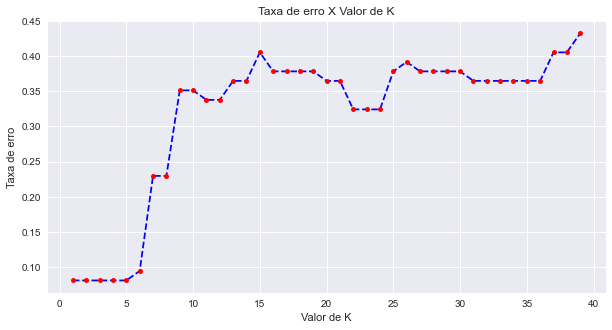

In [225]:
# Testando o erro para diferentes valores de k

taxa_erro = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    taxa_erro.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,5))
plt.plot(range(1,40), taxa_erro, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=5)
plt.title('Taxa de erro X Valor de K')
plt.xlabel('Valor de K')
plt.ylabel('Taxa de erro')

print(f'O erro mínimo é {min(taxa_erro)} sendo K = {taxa_erro.index(min(taxa_erro))}')

Nos testes realizados, é possível observar que para k > 5, a taxa de erro do modelo vai aumentando. Em alguns pontos é menor que o anterior, porém, não é significativo

Avaliando a matriz de confusão:

In [226]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [227]:
cm = confusion_matrix(y_test, preds)

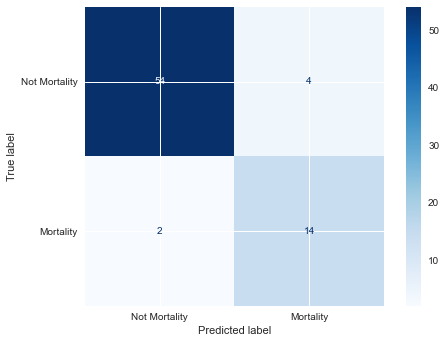

In [228]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Mortality', 'Mortality'])
disp.plot(cmap='Blues')

Pela matriz de confusão acima, aparentemente há poucos erros

Avaliando a precisão e recall do modelo:

In [229]:
print(classification_report(y_test, preds, target_names=['Not_Mortality', 'Mortality']))

               precision    recall  f1-score   support

Not_Mortality       0.96      0.93      0.95        58
    Mortality       0.78      0.88      0.82        16

     accuracy                           0.92        74
    macro avg       0.87      0.90      0.89        74
 weighted avg       0.92      0.92      0.92        74



Nesse report, estão as métricas de precision, recall e f1-score para ambas as classes.

Neste caso, o modelo está identificando melhor as classes de não-mortalidade e isto devido a de fato terem mais casos desta classe

Calculando a AUC-ROC

In [230]:
from sklearn.metrics import roc_curve, auc

# Essa função calcula a curva roc e retorna a taxa de true positive, false positive e os thresholds

fpr, tpr, thresholds = roc_curve(y_test, preds)

auc(fpr, tpr)

0.9030172413793103

## Como ficaria o modelo sem a seleção de features e sem balanceamento??

In [231]:
X.head()

,Age,Age.Group,F.History,Diabetes,BP,Thrombolysis,BGR,B.Urea,S.Cr,S.Sodium,...,"Diagnosis_old I/W M.I, ACS.",Hypersensitivity_NO,Hypersensitivity_YES,SK.React_BODY.PAIN,SK.React_COUGH.BLEEDING,SK.React_LUNGS,SK.React_NAUSEA.TEMP,SK.React_NO,SK.React_SKIN.BLEEDING,SK.React_STOMACH.BLEEDING
0,45,2,0,1,100.6,0,84,28.0,0.9,138,...,0,1,0,0,0,0,0,1,0,0
1,51,3,0,0,90.6,0,135,17.0,0.7,144,...,0,1,0,0,0,0,0,1,0,0
2,55,3,0,1,100.7,0,146,37.0,1.0,137,...,0,1,0,0,0,0,0,1,0,0
3,55,3,0,1,160.1,0,146,37.0,1.0,137,...,0,1,0,0,0,0,0,1,0,0
4,56,3,0,1,90.6,0,85,78.0,1.2,139,...,0,1,0,0,0,0,0,1,0,0


In [232]:
y.value_counts()

0    288
1     80
Name: Mortality, dtype: int64

In [233]:
X_train_semfe, X_test_semfe, y_train_semfe, y_test_semfe = train_test_split(X, y, test_size=.2, random_state=1)

# Instanciando o classificador
neigh_semfe = KNeighborsClassifier(n_neighbors=3)

# Treinamento do modelo
neigh_semfe.fit(X_train_semfe, y_train_semfe)

KNeighborsClassifier(n_neighbors=3)

               precision    recall  f1-score   support

not_Mortality       0.92      0.95      0.93        58
    Mortality       0.79      0.69      0.73        16

     accuracy                           0.89        74
    macro avg       0.85      0.82      0.83        74
 weighted avg       0.89      0.89      0.89        74

AUC: 0.8178879310344828


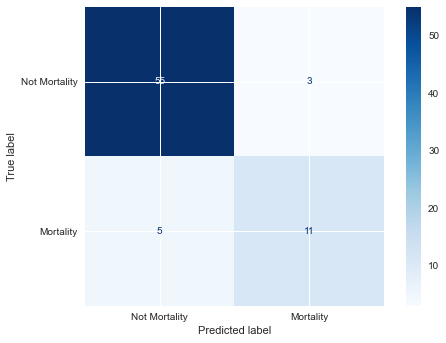

In [234]:
preds_semfe = neigh_semfe.predict(X_test_semfe)

cm_semfe = confusion_matrix(y_test_semfe, preds_semfe)

# Plota a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm_semfe, display_labels=['Not Mortality', 'Mortality'])
disp.plot(cmap='Blues')

print(classification_report(y_test_semfe, preds_semfe, target_names=['not_Mortality', 'Mortality']))

# Essa função calcula a curva roc e retorna a taxa de true positive, false positive e os thresholds
fpr_semfe, tpr_semfe, thresholds_semfe = roc_curve(y_test_semfe, preds_semfe)

print('AUC: ' + str(auc(fpr_semfe, tpr_semfe)))

## Mudando os valores e reavaliando

In [235]:
# Neste teste, serão removidas as variáveis que possuem correlação maior que 0.8

correlated_features = set()
for i in range(len(corr_matrix .columns)):
    for j in range(i+1, len(corr_matrix .columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            print(corr_matrix.columns[i]+" - "+corr_matrix.columns[j])
            colname = corr_matrix.columns[i]
            correlated_features.add(colname)

print(correlated_features)

Age - Age.Group
F.History - Family.History_NO
F.History - Family.History_YES
B.Urea - S.Cr
B.Urea - CO_Chest pain,COLD SWEATING, VOMITING
B.Urea - Diagnosis_STEMI
S.Cr - CO_Chest pain,COLD SWEATING, VOMITING
S.Cr - Diagnosis_STEMI
C.P.K - CK.MB
ESR - Others _PND, ORTHOPENIA
ESR - CO_SOB FROM 1 DAY 
ESR - Diagnosis_ACS, NSTEMI
RBC - P.C.V
Hemoglobin - P.C.V
M.C.V - M.C.H
NEUTROPHIL - CO_Chest pain,Sweating, 
NEUTROPHIL - Diagnosis_AC. WALL M.I
SK - Others _HCV, IHD
SK - CO_Chest pain,sweating,vomiting
SK - Diagnosis_old I/W M.I, ACS.
Reaction - Gender_Female
Reaction - Gender_Male
Reaction - SK.React_NO
Gender_Female - Gender_Male
Gender_Female - SK.React_NO
Gender_Male - SK.React_NO
Locality  _RURAL - Locality  _URBAN
Marital status                       _MARRIED - Marital status                       _SINGLE
Life.Style                                                                              _NO - Life.Style                                                                           

In [236]:
correlated_features.remove('Gender_Female')
correlated_features.add('SK.React_NO')

In [237]:
X_novo = X.drop(labels=correlated_features, axis=1)

In [238]:
len(X_novo.columns)

103

In [241]:
# Selecionando 20 variáveis para treino e observando como fica o modelo

trans = GenericUnivariateSelect(score_func=mutual_info_classif, param=20)
X_novo = trans.fit_transform(X_novo, y)

In [242]:
X_novo2 = pd.DataFrame(X_novo2, columns=X_novo.columns[trans.get_support()])

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [243]:
# Separando em treino e teste

X_train,X_test,y_train,y_test=train_test_split(X_novo2,y,test_size=.2,random_state=42)

In [244]:
data=pd.concat([X_train,y_train],axis=1)


not_dead=data[data.Mortality==0]
dead=data[data.Mortality==1]

# Oversampling da classe minoritária
dead_upsampled = resample(dead,
                          replace=True, # Amostra com reposição
                          n_samples=len(not_dead), # Iguala ao número de casos da classe majoritária
                          random_state=13) # Resultados reprodutíveis

# Combina maioria e minoria com oversampling
upsampled = pd.concat([not_dead, dead_upsampled])

# Verificar novas contagens de classe
upsampled.Mortality.value_counts()

0    231
1    231
Name: Mortality, dtype: int64

In [ ]:
X_train = upsampled.drop('Mortality', axis=1)
y_train = upsampled['Mortality']

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Avaliando

accuracy_score(y_test, preds)

0.581081081081081

               precision    recall  f1-score   support

not_Mortality       0.73      0.72      0.73        57
    Mortality       0.11      0.12      0.11        17

     accuracy                           0.58        74
    macro avg       0.42      0.42      0.42        74
 weighted avg       0.59      0.58      0.59        74



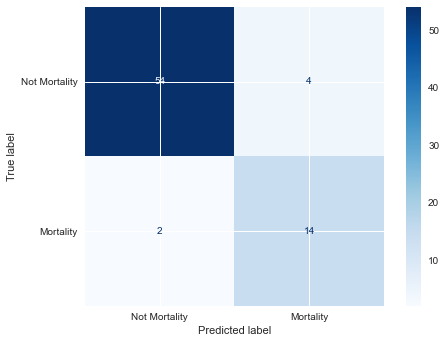

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Mortality', 'Mortality'])
disp.plot(cmap='Blues')

print(classification_report(y_test, preds, target_names=['not_Mortality', 'Mortality']))

## Outras funções de distância

Além da distância euclidiana (mais utilizada), há diferentes funções de distância. Abaixo, serão apresentadas algumas delas:

- **Distância Manhattan**: chamada também de "geometria/métrica do táxi", "distância retilínea" e "distância do quarteirão da cidade". Neste caso, a métrica usual da geometria euclidiana é substituída por uma nova métrica na qual a distância entre dois pontos é a soma das diferenças (absolutas) de suas coordenadas. É definida como a soma dos comprimentos das projeções do segmento de linha entre os pontos nos eixos coordenados.

![](manhattan_distance.png)

- **Distância de Chebyshev**: também é conhecida como "distância do tabuleiro de xadrez", pois no jogo de xadrez o número mínimo de movimentos necessários para um rei ir de uma casa a outra no tabuleiro é igual à distância de Chebyshev entre os centros das casas

![](chebyshev_distance.png)

- **Distância Hamming**: este estilo de distância mede o número mínimo de substituições necessárias para mudar uma string para a outra.

![](hamming_distance.png)